# 1) Loading Packages and Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import json
import datetime
from statistics import mean
import collections

from time import time
import scipy.stats
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt



# Pandas, and NumPy: 

from time import time


import datetime
import collections

import scipy.stats


# Reading the data

In [5]:

# Read the Excel file
df = pd.read_excel('encoded23.xlsx')

# Convert the data to CSV format
df.to_csv('encoded23.csv', index=False)

# Read the CSV file
data = pd.read_csv('encoded23.csv')



# 4) Data Structure and Content

In [7]:
data.head()

,الجنس,الفرع,التخصص,المعسكرات والشهادات اللازمة,الجهات التدريبية,الشهادات المهنية اللازمة
0,2,1,5,1,1,5
1,2,3,3,3,2,4
2,2,1,3,3,2,3
3,2,1,1,6,2,5
4,1,1,3,3,2,4


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   الجنس                        69 non-null     int64
 1   الفرع                        69 non-null     int64
 2   التخصص                       69 non-null     int64
 3   المعسكرات والشهادات اللازمة  69 non-null     int64
 4   الجهات التدريبية             69 non-null     int64
 5   الشهادات المهنية اللازمة     69 non-null     int64
dtypes: int64(6)
memory usage: 3.4 KB


In [9]:
data.columns

Index(['الجنس', 'الفرع', 'التخصص', 'المعسكرات والشهادات اللازمة',
       'الجهات التدريبية', 'الشهادات المهنية اللازمة'],
      dtype='object')

In [10]:
data.describe()

,الجنس,الفرع,التخصص,المعسكرات والشهادات اللازمة,الجهات التدريبية,الشهادات المهنية اللازمة
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,1.507246,1.869565,2.550725,3.666667,2.217391,3.173913
std,0.503610,1.270862,0.963087,1.461935,0.905369,1.124023
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,3.000000,2.000000,3.000000
50%,2.000000,1.000000,3.000000,3.000000,2.000000,3.000000
75%,2.000000,2.000000,3.000000,5.000000,3.000000,3.000000
max,2.000000,6.000000,5.000000,6.000000,4.000000,5.000000


In [11]:
data['التخصص'].value_counts()

3    34
2    16
1    12
4     5
5     2
Name: التخصص, dtype: int64

In [12]:
data['الجنس'].value_counts()

2    35
1    34
Name: الجنس, dtype: int64

In [13]:
data['الجهات التدريبية'].value_counts()


2    34
1    14
3    13
4     8
Name: الجهات التدريبية, dtype: int64

In [14]:
data['الفرع'].value_counts()

1    38
2    14
3    12
6     3
4     1
5     1
Name: الفرع, dtype: int64

In [15]:
data['المعسكرات والشهادات اللازمة'].value_counts()

3    29
5    18
6     8
1     6
2     5
4     3
Name: المعسكرات والشهادات اللازمة, dtype: int64

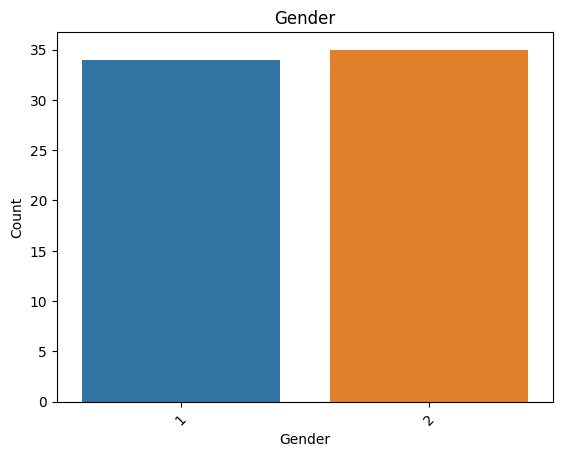

In [16]:

sns.countplot(data=data, x='الجنس')

# Customize the plot
plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


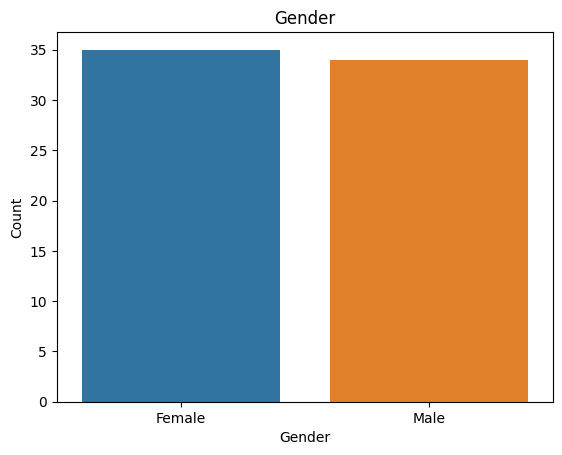

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Map the encoded values to their corresponding names
data['الجنس'] = data['الجنس'].map({
    1: 'Male',
    2: 'Female'
})

# Create a countplot with named columns
sns.countplot(data=data, x='الجنس')

# Customize the plot
plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Show the plot
plt.show()


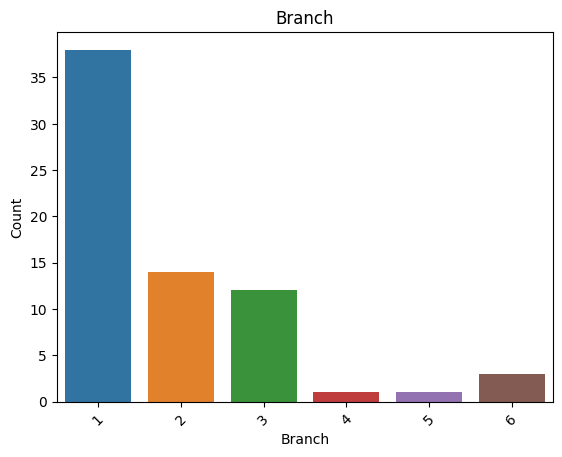

In [17]:

sns.countplot(data=data, x='الفرع')

# Customize the plot
plt.title('Branch')
plt.xlabel('Branch')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


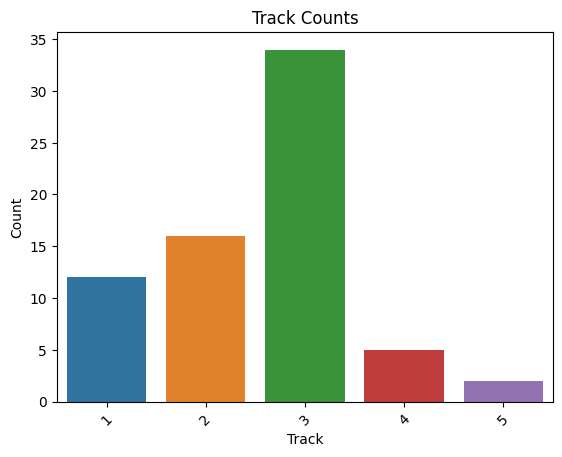

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with the Arabic column name
sns.countplot(data=data, x='التخصص')

# Customize the plot
plt.title('Track Counts')
plt.xlabel('Track')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


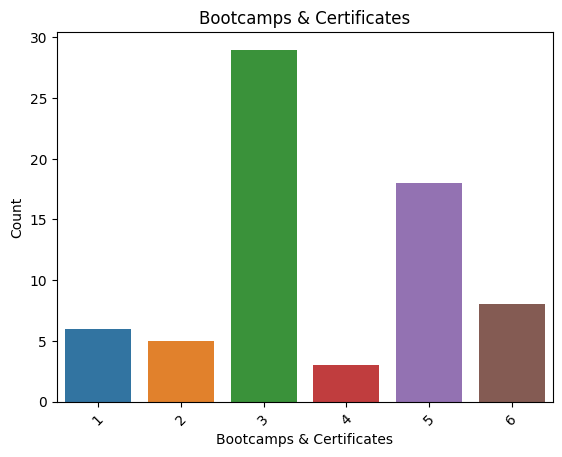

In [19]:

sns.countplot(data=data, x='المعسكرات والشهادات اللازمة')

# Customize the plot
plt.title('Bootcamps & Certificates')
plt.xlabel('Bootcamps & Certificates')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


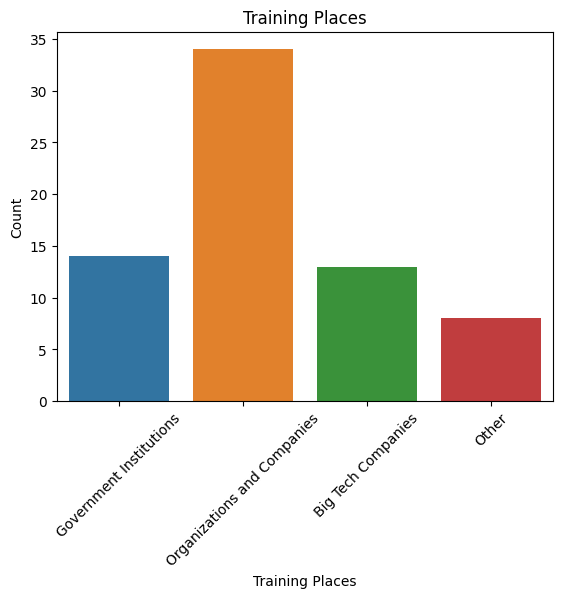

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your data loaded in a DataFrame called 'df'

# Define a dictionary to map 'الجهات التدريبية' encodings to names
training_places_names = {
    1: 'Government Institutions',
    2: 'Organizations and Companies',
    3: 'Big Tech Companies',
    4: 'Other'
}

# Map the encodings to names in the DataFrame
df['الجهات التدريبية'] = df['الجهات التدريبية'].map(training_places_names)

# Create a countplot with named columns
sns.countplot(data=df, x='الجهات التدريبية')

# Customize the plot
plt.title('Training Places')
plt.xlabel('Training Places')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


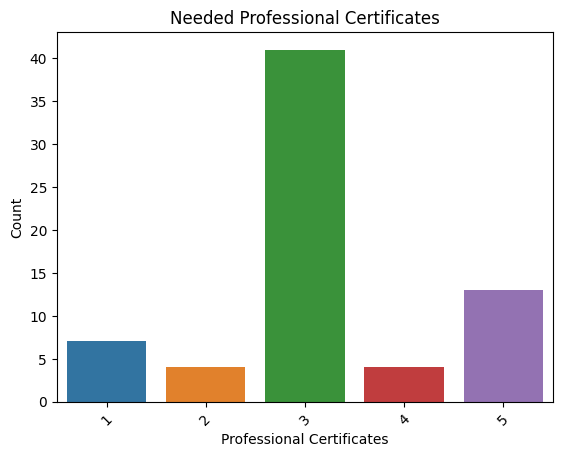

In [21]:

# Assuming 'data' is your DataFrame with the Arabic column name
sns.countplot(data=data, x='الشهادات المهنية اللازمة')

# Customize the plot
plt.title('Needed Professional Certificates')
plt.xlabel('Professional Certificates')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


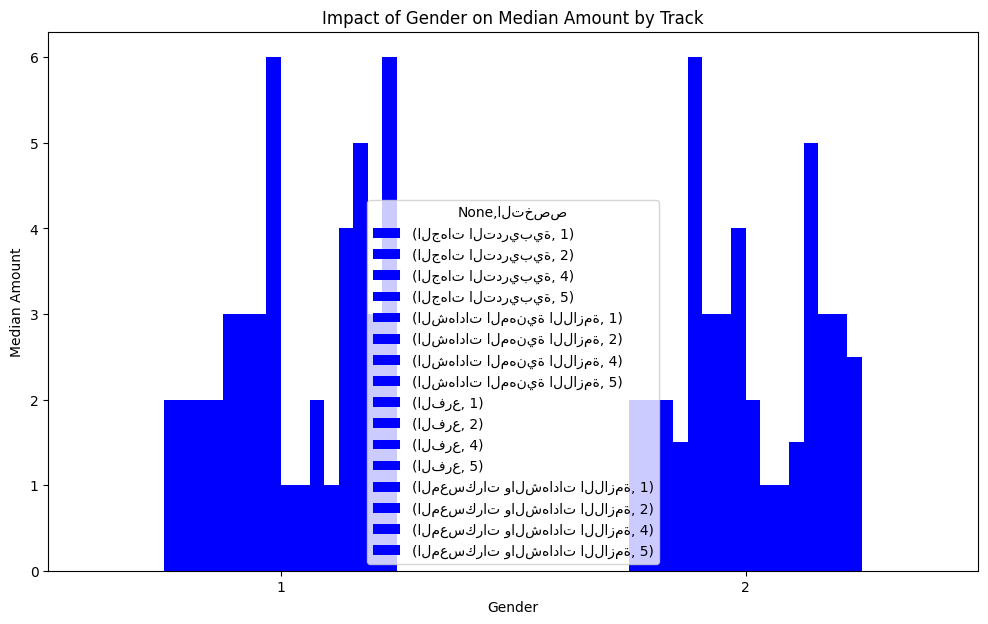

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named data with encoded 'Gender' and 'Track' columns
# Replace 'Gender' and 'Track' with the actual column names in your DataFrame

# Create a pivot table to calculate the median of some numerical column (replace 'Amount' with your column name)
pivot_table = data.pivot_table(index='الجنس', columns='التخصص', aggfunc='median', fill_value=0)

# Create a bar plot
pivot_table.plot(kind='bar', figsize=(12, 7), color='blue')
plt.xlabel("Gender")
plt.ylabel("Median Amount")
plt.title("Impact of Gender on Median Amount by Track")
plt.xticks(rotation=0)
plt.show()


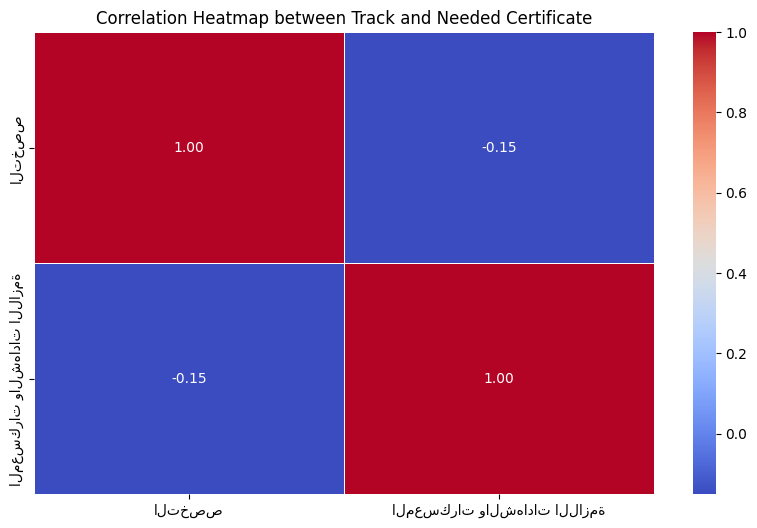

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named data with encoded 'Track' and 'Needed Certificate' columns
# Replace 'Track' and 'Needed Certificate' with the actual column names in your DataFrame

# Calculate the correlation matrix
correlation_matrix = data[['التخصص', 'المعسكرات والشهادات اللازمة']].corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap between Track and Needed Certificate')
plt.show()


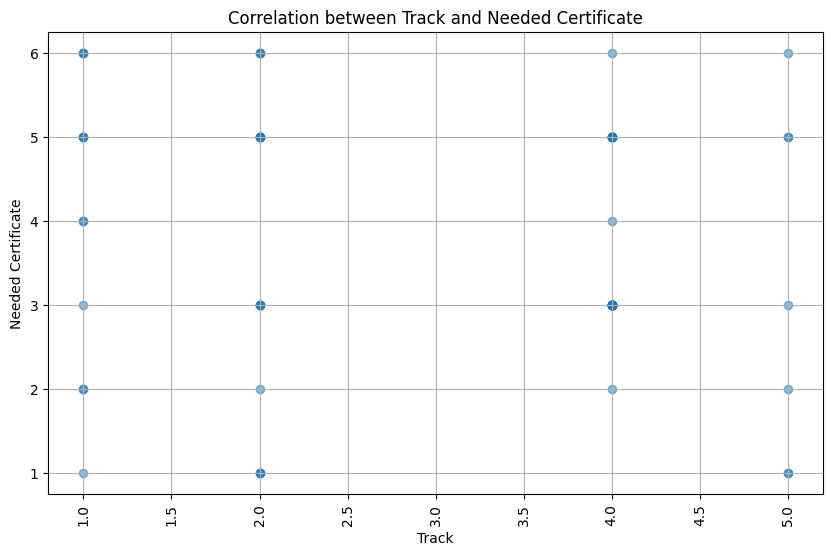

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named data with encoded 'Track' and 'Needed Certificate' columns
# Replace 'Track' and 'Needed Certificate' with the actual column names in your DataFrame

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['التخصص'], data['المعسكرات والشهادات اللازمة'], alpha=0.5)
plt.xlabel('Track')
plt.ylabel('Needed Certificate')
plt.title('Correlation between Track and Needed Certificate')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.grid(True)
plt.show()


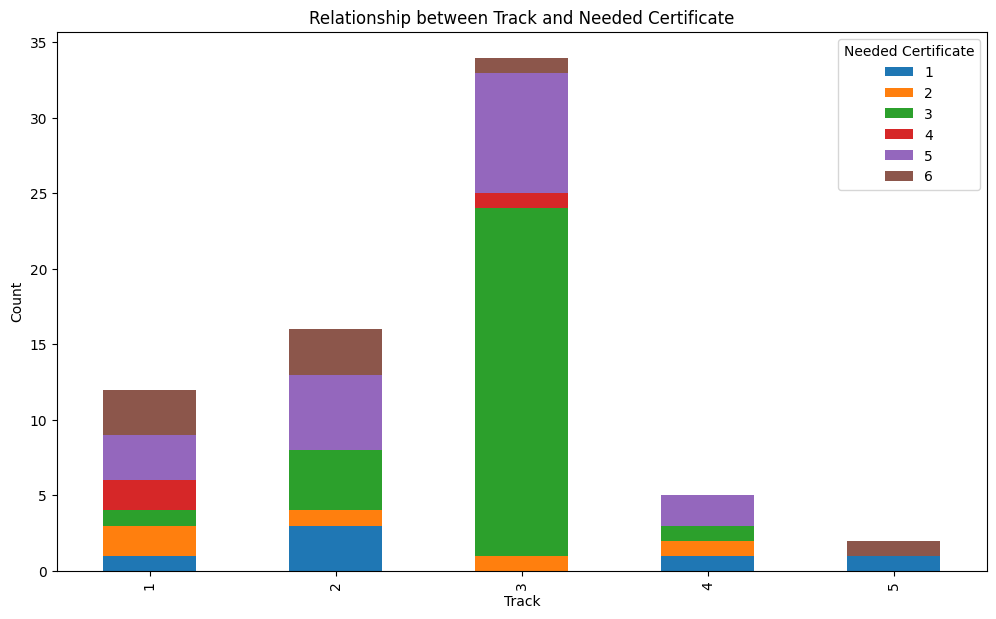

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named data with encoded 'Track' and 'Needed Certificate' columns
# Replace 'Track' and 'Needed Certificate' with the actual column names in your DataFrame

# Create a pivot table to count occurrences
pivot_table = data.groupby(['التخصص', 'المعسكرات والشهادات اللازمة']).size().unstack(fill_value=0)

# Create a bar plot
pivot_table.plot(kind='bar', figsize=(12, 7), stacked=True)
plt.xlabel('Track')
plt.ylabel('Count')
plt.title('Relationship between Track and Needed Certificate')

plt.legend(title='Needed Certificate', loc='upper right')
plt.show()


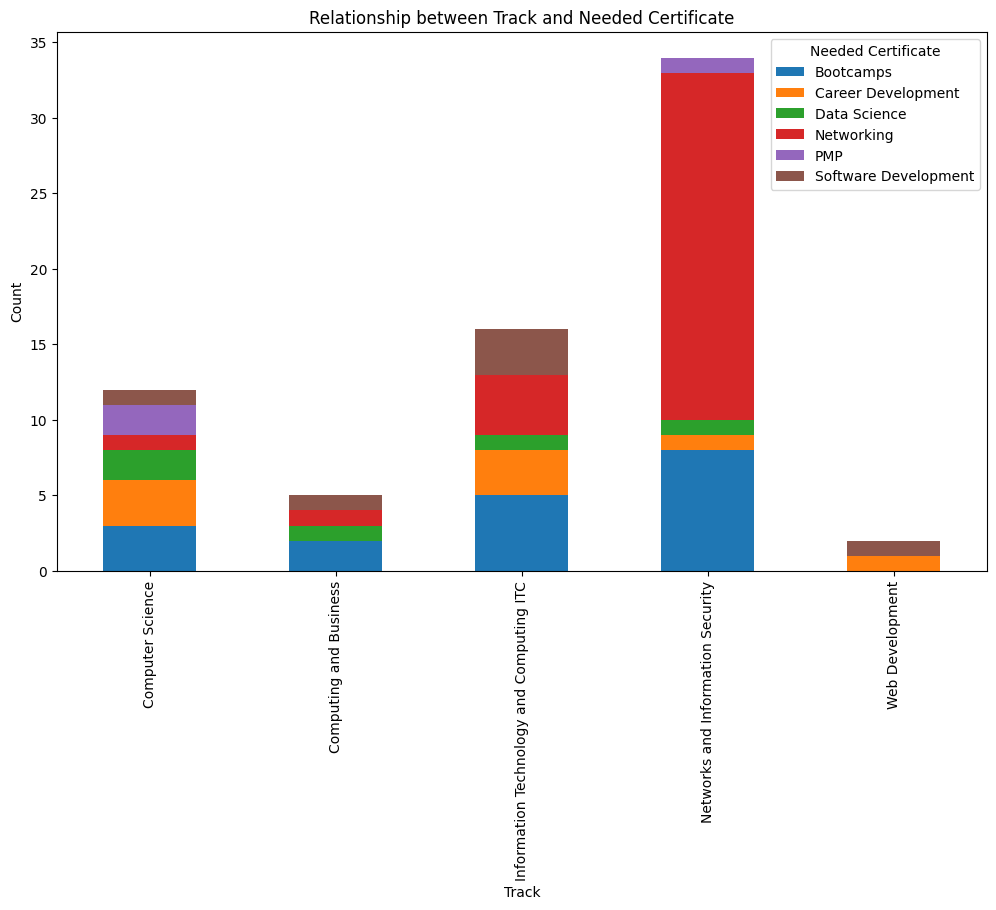

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named data with encoded 'Track' and 'Needed Certificate' columns
# Replace 'Track' and 'Needed Certificate' with the actual column names in your DataFrame

# Define dictionaries to map track and certificate encodings to names
track_names = {
    1: 'Computer Science',
    2: 'Information Technology and Computing ITC',
    3: 'Networks and Information Security',
    4: 'Computing and Business',
    5: 'Web Development'
}

certificate_names = {
    1: 'Software Development',
    2: 'Data Science',
    3: 'Networking',
    4: 'PMP',
    5: 'Bootcamps',
    6: 'Career Development'
}

# Map track and certificate encodings to names in the DataFrame
data['التخصص'] = data['التخصص'].map(track_names)
data['المعسكرات والشهادات اللازمة'] = data['المعسكرات والشهادات اللازمة'].map(certificate_names)

# Create a pivot table to count occurrences
pivot_table = data.groupby(['التخصص', 'المعسكرات والشهادات اللازمة']).size().unstack(fill_value=0)

# Create a bar plot
pivot_table.plot(kind='bar', figsize=(12, 7), stacked=True)
plt.xlabel('Track')
plt.ylabel('Count')
plt.title('Relationship between Track and Needed Certificate')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.legend(title='Needed Certificate', loc='upper right')
plt.show()
